# MLP Matrix Factorization

In [7]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Model
from keras.layers import (
    Input, 
    Embedding, 
    Flatten, 
    Dense, 
    Concatenate,
    Dropout, 
    BatchNormalization,
    Activation
)
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

In [2]:
df = pd.read_csv('data/small_preprocessed_rating.csv')
print(df.shape)

(2206428, 6)


In [3]:
N = df.SmallUserId.max() + 1
M = df.SmallNewMovieId.max() + 1

In [4]:
# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

# initialize variables
K = 10 # latent dimensionality
mu = df_train.rating.mean()
epochs = 15
reg = 0. # regularization penalty

In [8]:
# Keras Model

# Initialize Input
u = Input(shape=(1,))
m = Input(shape=(1,))

# User and Movie Embedding
u_embedding = Embedding(N, K)(u) # (N, 1, K)
m_embedding = Embedding(M, K)(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
x = Concatenate()([u_embedding, m_embedding]) # (N, 2K)

# MLP
x = Dense(400)(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(100)(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
x = Dense(1)(x)

model = Model(inputs=[u, m], outputs=x)
model.compile(
    loss='mse',
    # optimizer='adam',
    # optimizer=Adam(lr=0.01),
    optimizer=SGD(lr=0.08, momentum=0.9),
    metrics=['mse'],
)

r = model.fit(
    x=[df_train.SmallUserId.values, df_train.SmallNewMovieId.values],
    y=df_train.rating.values - mu,
    epochs=epochs,
    batch_size=128,
    validation_data=(
        [df_test.SmallUserId.values, df_test.SmallNewMovieId.values],
        df_test.rating.values - mu
    )
)

Epoch 1/15


/Users/allenchen/miniforge3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-02-26 15:56:20.641597: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13791/13791 [==============================] - 9s 619us/step - loss: 0.7220 - mse: 0.7220 - val_loss: 0.6889 - val_mse: 0.6889
Epoch 2/15
13791/13791 [==============================] - 9s 622us/step - loss: 0.6647 - mse: 0.6647 - val_loss: 0.6563 - val_mse: 0.6563
Epoch 3/15
13791/13791 [==============================] - 9s 635us/step - loss: 0.6452 - mse: 0.6452 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 4/15
13791/13791 [==============================] - 8s 605us/step - loss: 0.6329 - mse: 0.6329 - val_loss: 0.6352 - val_mse: 0.6352
Epoch 5/15
13791/13791 [==============================] - 9s 626us/step - loss: 0.6194 - mse: 0.6194 - val_loss: 0.6289 - val_mse: 0.6289
Epoch 6/15
13791/13791 [==============================] - 8s 603us/step - loss: 0.6117 - mse: 0.6117 - val_loss: 0.6356 - val_mse: 0.6356
Epoch 7/15
13791/13791 [==============================] - 8s 613us/step - loss: 0.6033 - mse: 0.6033 - val_loss: 0.6363 - val_mse: 0.6363
Epoch 8/15
13791/13791 [=====================

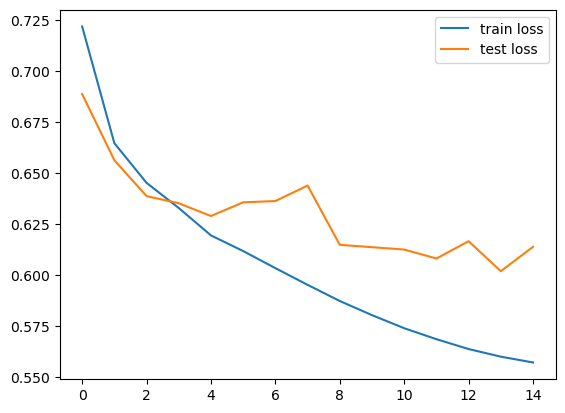

In [10]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()